# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [13]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [14]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=57.05630999563295, pvalue=4.0773660791301007e-13)


In [15]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

Candidate topics to explore:

- `scipy.stats.chi2` - the Chi-squared distribution, which we can use to reproduce the Chi-squared test
- Calculate the Chi-Squared test statistic "by hand" (with code), and feed it into `chi2`
- Build a confidence interval with `stats.t.ppf`, the t-distribution percentile point function (the inverse of the CDF) - we can write a function to return a tuple of `(mean, lower bound, upper bound)` that you can then use for the assignment (visualizing confidence intervals)

## Confidence Intervals

In [21]:
coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1]


In [22]:
import scipy.stats as stats

stats.ttest_1samp(coinflips, 0.5)

Ttest_1sampResult(statistic=-1.2026755886059095, pvalue=0.2319703834219536)

In [31]:
def confidence_interval(data, confidence=0.95):
    '''
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence.
    
    Arguments:
        data - iterable (list or numpy array) of sample observations
        confidence - level of confidence for internal
      
    Returns:
        tuple of (mean, lower bound, upper bound)
    '''
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = stats.sem(data) # Calculate the standard error of the mean
    interval = stderr * stats.t.ppf((1 + confidence) / 2., n -1) #Percent Point Function
    return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
    '''
    Return a string with a pretty report of a confidence interval.
    
    Arguments:
        confidence_interval - tuple of (mean, lower bound, upper bound)
        
    Returns:
        None, but prints to screen the report
    '''
    #print('Mean: {}'.format(confidence_interval[0]))
    #print('Lower bound: {}'.format(confidence_interval[1]))
    #print('Upper bound: {}'.format(confidence_interval[2]))
    s = "our mean lies in the interval [{:.2}, {:.2}]".format(
        confidence_interval[1], confidence_interval[2])
    return s

In [32]:
coinflip_interval = confidence_interval(coinflips) # Default 95% conf
report_confidence_interval(coinflip_interval)

'our mean lies in the interval [0.34, 0.54]'

In [34]:
stats.sem??

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [129]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

df = pd.read_csv(url, header=None, names=['Party Name', 'Handicapped Infants', 'Water Project Cost Sharing',
                                         'Adoption of the Budget Resolution', 'Physician Fee Freeze', 
                                          'El Salvador Aid', 'Religious Groups in Schools', 
                                          'Anti-Satellite Test Ban', 'Aid to Nicaragua', 'MX Missile', 
                                          'Immigration', 'Synfuels Corporation Cutback', 'Education Spending', 
                                          'Superfund Right to Sue', 'Crime', 'Duty Free Exports', 
                                          'Export Admin Act South Africa'])

df.head()

,Party Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaragua,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Admin Act South Africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Cleaning dataframe

In [130]:
df.replace('n', 0, inplace=True)
df.replace('y', 1, inplace=True)
df.replace('?', 0, inplace=True)

### Creating a dataframes with just Republicans or Democrats

In [131]:
reps = df[ df['Party Name'] == 'republican' ]
dems = df[ df['Party Name'] == 'democrat' ]

In [132]:
reps.shape, dems.shape

((168, 17), (267, 17))

In [1]:
def create_interval_table(df):
    '''
    Accepts a dataframe and calculates confidence intervals 
    based on the mean of each column's sample data
    
    Arguments:
        dataframe (skips first column)
        
    Returns:
        Dictionary. Each column will be represented as follows:
        'Column Name': [sample mean, upper 95% CI interval, lower 95% CI interval]
    '''
    from collections import OrderedDict
    
    interval_table = OrderedDict()
    
    # Determine mean, 95% CI lower bound, and 95% CI upper bound for each column
    for column in df.columns.tolist()[1:]:
        interval = confidence_interval( df[column].dropna() )
        interval_table[column] = interval
        
    # Convert Ordered Dictionary to DataFrame
    interval_frame = pd.DataFrame.from_dict(interval_table, orient='index', columns=['Sample Mean','Upper Bound (95% CI)','Lower Bound (95% CI)'])
    
    # Reset Index to be RangeIndex
    interval_frame = interval_frame.reset_index().rename(columns={'index':'bill'})
    
    return interval_frame

In [134]:
reps_intervals = create_interval_table(reps)

In [135]:
dems_intervals = create_interval_table(dems)

## Visualizing Democratic and Republican Support

In [136]:
import matplotlib.pyplot as plt

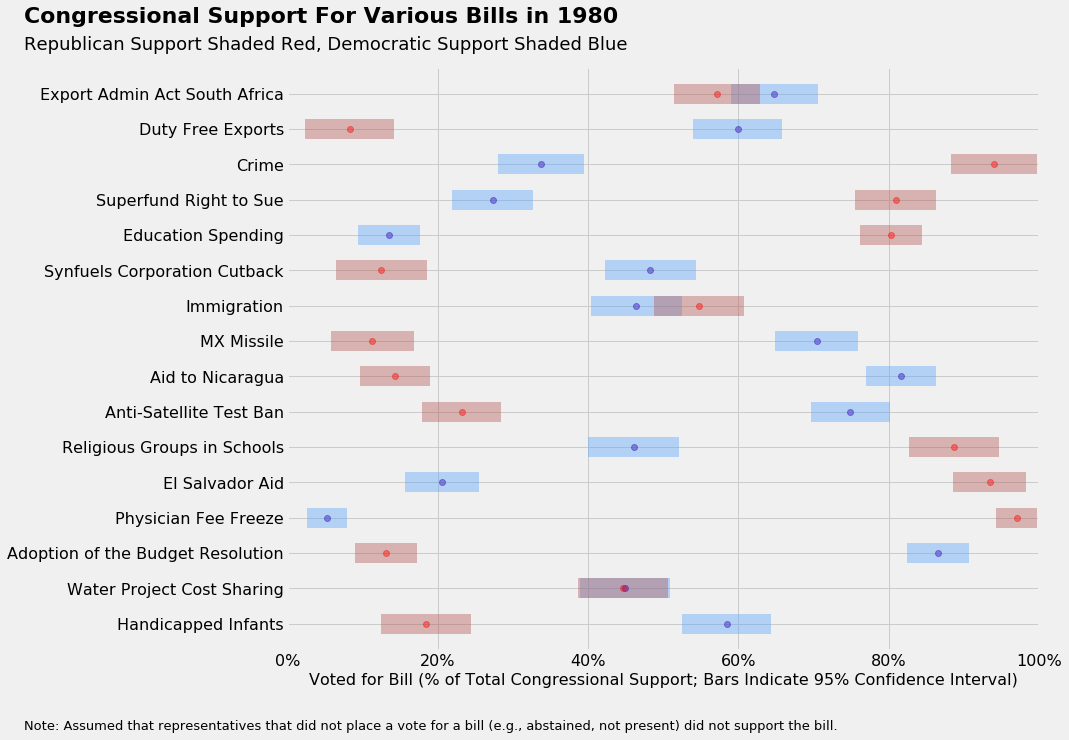

In [142]:
#Set figure style and size
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,10))

#Plot Democratic support
xerr = dems_intervals['Sample Mean'] - dems_intervals['Lower Bound (95% CI)']
x = dems_intervals['Sample Mean']
y = dems_intervals['bill']
ax.errorbar(x, y,
            xerr=xerr, 
            fmt='o', 
            color='#2b02b3', 
            ecolor='#55a4ff', 
            alpha=0.4, 
            elinewidth=20, 
            capsize=0)

#Plot Republican support
yerr = reps_intervals['Sample Mean'] - reps_intervals['Lower Bound (95% CI)']
x = reps_intervals['Sample Mean']
y = reps_intervals['bill']
ax.errorbar(x, y,
            xerr=xerr, 
            fmt='o', 
            color='red', 
            ecolor='#b55750', 
            alpha=0.4, 
            elinewidth=20, 
            capsize=0)

# Set Axis parameters and styling
ax.set(xticks=[0, .20, .40, .60, .80, 1.0])
ax.set_xticklabels( ["0%", "20%", "40%", "60%", "80%", "100%"] )
ax.set_xlim(left=0, right=1.0)
ax.tick_params(axis='both', labelsize=16)

# Set Text Labels
ax.set_xlabel('Voted for Bill (% of Total Congressional Support; Bars Indicate 95% Confidence Interval)', fontsize=16)
ax.text(x=-.35, 
        y=17, 
        s='Congressional Support For Various Bills in 1980', 
        fontsize=22, 
        fontweight='bold')
ax.text(x=-.35, 
        y=16.25, 
        s='Republican Support Shaded Red, Democratic Support Shaded Blue', 
        fontsize=18, 
        fontweight='normal')
ax.text(x=-.35, 
        y=-3, 
        s='Note: Assumed that representatives that did not place a vote for a bill (e.g., abstained, not present) did not support the bill.', 
        fontsize=13, 
        fontweight='normal')

plt.show()

The above visualziation helps us understand the how divided the support across and within politic party lines was for each bill. For example, support for the 'Physician Fee Freeze' bill was strongly split along party lines. Further, we can see that within each party there was strong concensus around supporting (republicans) or opposing the bill (democrats). We can tell this because the 95% confidence interval range is relatively small. 

On the other hand, we can see that democrats and republicans were roughly equally likely to support the 'Water Project Cost Sharing' bill. 